In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import warnings
from sklearn.model_selection import validation_curve, learning_curve
from utils import load_heart_data
import time
from sklearn.neighbors import KNeighborsClassifier

## Setup

In [3]:
X, y = load_heart_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

## Model Complexity Curve -  knn

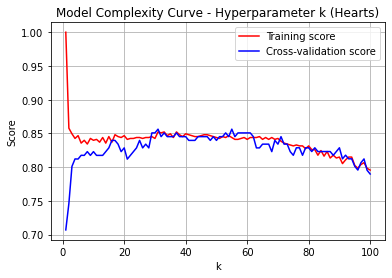

In [5]:
k_range = np.arange(1, 101)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors", 
                                             param_range=k_range, cv=5)

plt.figure()
plt.plot(k_range, np.mean(train_scores, axis=1), label='Training score', color='r')
plt.plot(k_range, np.mean(test_scores, axis=1), label='Cross-validation score', color='b')
plt.title('Model Complexity Curve - Hyperparameter k (Hearts)')
plt.xlabel('k')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_1.png')
plt.show()

## Optimal Model

In [6]:
k_optimal = np.argmax(np.mean(test_scores, axis=1)) + 1
print('Optimal value of k: %d' % k_optimal)
best_clf_knn = KNeighborsClassifier(n_neighbors=k_optimal)
t0 = time.time()
best_clf_knn.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0
print('Completed training in %f seconds' % train_time)
t0 = time.time()
y_pred = best_clf_knn.predict(X_test)
t1 = time.time()
test_time = t1 - t0
print('Inference time on test data: %f seconds' % test_time)
best_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of kNN with k = %d is %.2f%%' % (k_optimal, best_accuracy * 100))


Optimal value of k: 31
Completed training in 0.001374 seconds
Inference time on test data: 0.008538 seconds
Accuracy of kNN with k = 31 is 82.79%


## Learning Curve

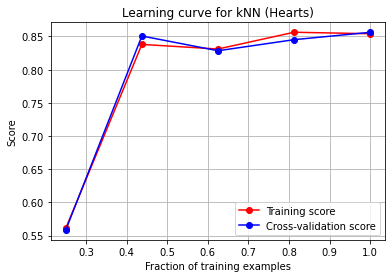

In [7]:
train_sizes = np.linspace(0.25, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_knn, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'ro-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'bo-', label='Cross-validation score')
plt.title('Learning curve for kNN (Hearts)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_learning_curve.png')
plt.show()